In [47]:
#import the libraries 

import numpy as np
import pandas as pd

# Supressing scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# print plots
%matplotlib inline 

# Machine Learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso 
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor, plot_importance
# Metrics
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To supress warnings and deprecated messages
import warnings

warnings.filterwarnings("ignore")

In [48]:
#load data and read the file 
anime = pd.read_csv("/content/anime_pre.csv")
data=anime.copy()
# print(data.shape)

#. Check description
# data.describe().T

data.shape
data.head()


,mediaType,eps,duration,ongoing,sznOfRelease,description,contentWarn,watched,watching,wantWatch,...,tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,studio_to_work,years_running,description_no_puntuation,description_Clean
0,TV,64.00,5.00,False,Spring,The foundation of alchemy is based on the law ...,1,103707.00,14351,25810,...,0,0,0,0,0,0,Others,1.00,the foundation of alchemy is based on the law ...,foundation alchemy based law equivalent exchan...
1,Movie,1.00,107.00,False,Unknown,Mitsuha and Taki are two total strangers livin...,0,58831.00,1453,21733,...,0,0,0,0,0,0,Others,0.00,mitsuha and taki are two total strangers livin...,mitsuha taki two total strangers living comple...
2,Movie,1.00,130.00,False,Unknown,"After transferring into a new school, a deaf g...",1,45892.00,946,17148,...,0,0,0,0,0,0,Others,0.00,after transferring into a new school a deaf gi...,transferring new school deaf girl shouko nishi...
3,TV,10.00,12.00,False,Fall,"Picking up where the second season ended, the ...",0,25134.00,2183,8082,...,0,0,1,0,0,0,Production I.G,0.00,picking up where the second season ended the b...,picking second season ended boys prepare final...
4,TV,10.00,5.00,False,Spring,The battle to retake Wall Maria begins now! Wi...,1,21308.00,3217,7864,...,0,0,0,0,0,0,Others,0.00,the battle to retake wall maria begins now wit...,battle retake wall maria begins eren’s new har...


In [49]:
# data.dropna(subset=[ "Unnamed"], inplace=True) 

# function to create labeled bar-plots

In [50]:
# function to create labeled barplots from class


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

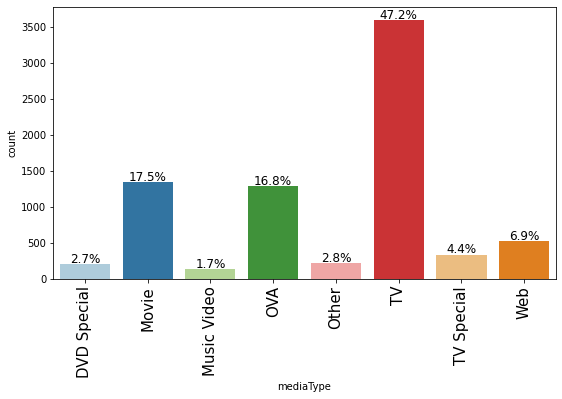

In [51]:
labeled_barplot(data, "mediaType", perc=True)

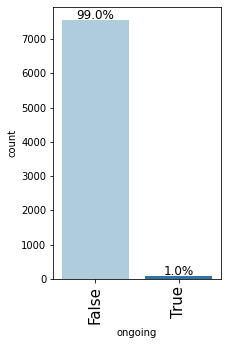

In [52]:
labeled_barplot(data, "ongoing", perc=True)

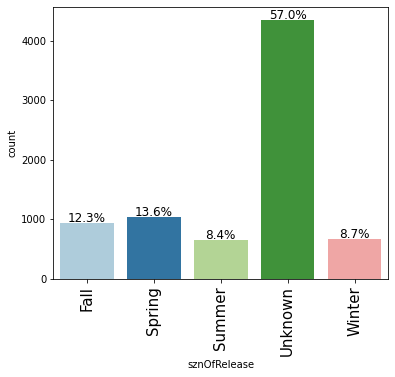

In [53]:
labeled_barplot(data, "sznOfRelease", perc=True)

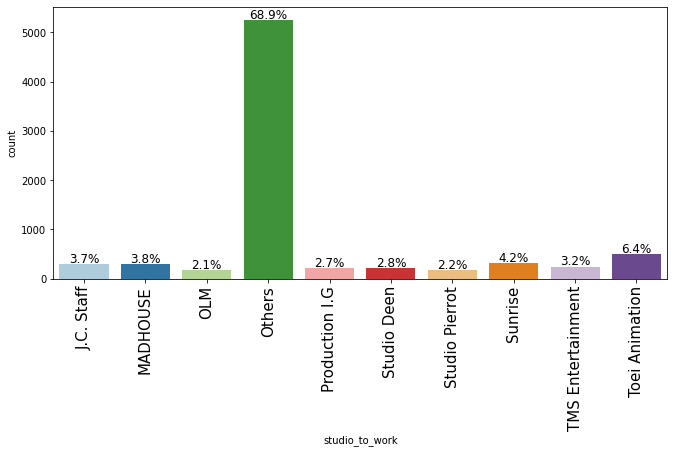

In [54]:
labeled_barplot(data, "studio_to_work", perc=True)

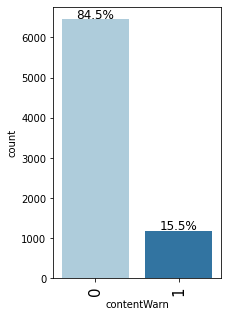

In [55]:
labeled_barplot(data, "contentWarn", perc=True)

0    5376
1    2257
Name: tag_'Comedy', dtype: int64
--------------------------------------------------
0    4856
1    2777
Name: tag_'Based on a Manga', dtype: int64
--------------------------------------------------
0    5256
1    2377
Name: tag_'Action', dtype: int64
--------------------------------------------------
0    5968
1    1665
Name: tag_'Fantasy', dtype: int64
--------------------------------------------------
0    5999
1    1634
Name: tag_'Sci Fi', dtype: int64
--------------------------------------------------
0    6266
1    1367
Name: tag_'Shounen', dtype: int64
--------------------------------------------------
0    6911
1     722
Name: tag_'Family Friendly', dtype: int64
--------------------------------------------------
0    6331
1    1302
Name: tag_'Original Work', dtype: int64
--------------------------------------------------
0    6763
1     870
Name: tag_'Non-Human Protagonists', dtype: int64
--------------------------------------------------
0    6611
1    1022


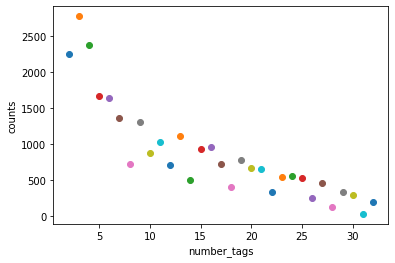

In [56]:
# creating a list of tag columns
tag_cols = [item for item in data.columns if "tag" in item]
# checking the values in tag columns
i=1
for column in tag_cols:
    i +=1
    save_tag_counts = data[column].value_counts()
    print(data[column].value_counts())
    print("-" * 50)
    plt.plot(i, save_tag_counts[1], "o")
    plt.title("")
    plt.xlabel("number_tags")
    plt.ylabel("counts")

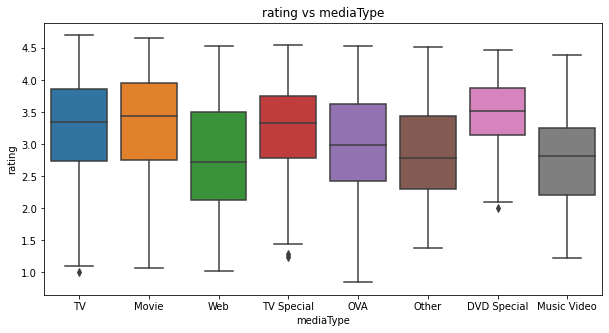

In [57]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="mediaType", y="rating", data=data)
plt.title("rating vs mediaType")
plt.show()

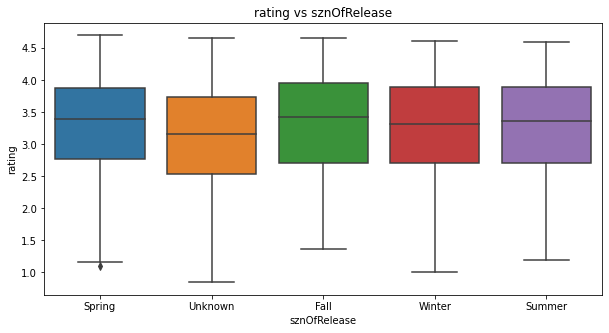

In [58]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="sznOfRelease", y="rating", data=data)
plt.title("rating vs sznOfRelease")
plt.show()

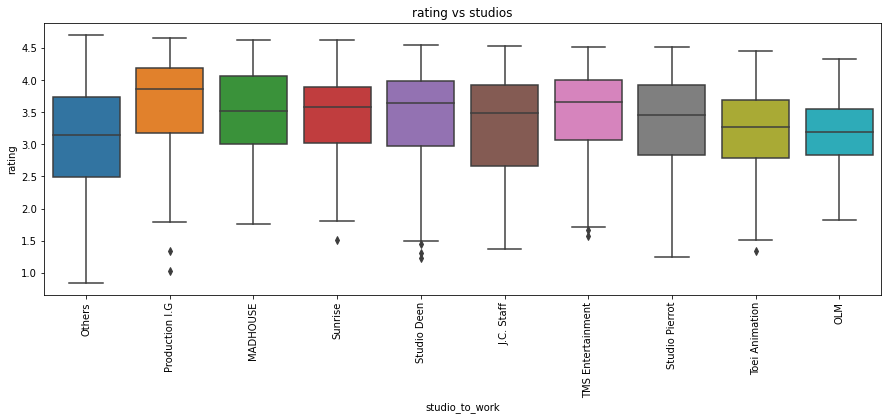

In [59]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="studio_to_work", y="rating", data=data)
plt.xticks(rotation=90)
plt.title("rating vs studios")
plt.show()

In [ ]:
# plt.figure(figsize=(15, 5))
# sns.boxplot(x="tag", y="rating", data=data)
# plt.xticks(rotation=90)
# plt.title("rating vs studios")
# plt.show()

In [60]:
# creating a list of non-tag columns
corr_cols = [item for item in data.columns if "tag" not in item]
print(corr_cols[1:18])
print(len(corr_cols))

['eps', 'duration', 'ongoing', 'sznOfRelease', 'description', 'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes', 'studio_to_work', 'years_running', 'description_no_puntuation', 'description_Clean']
17


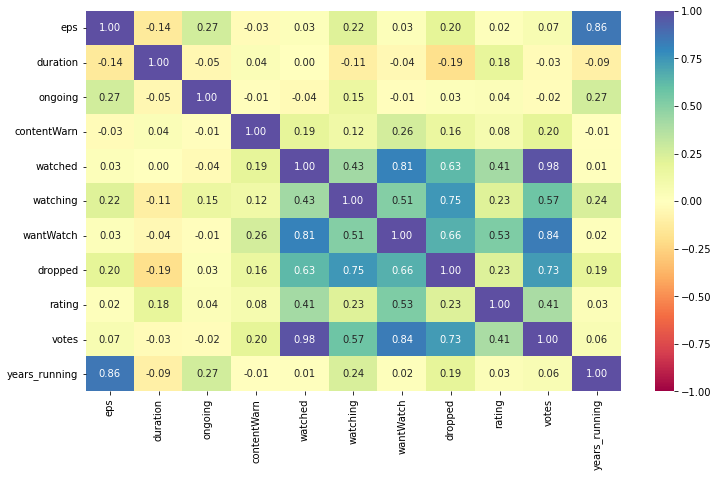

In [61]:
#correlation between between columns
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[corr_cols[1:18]].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

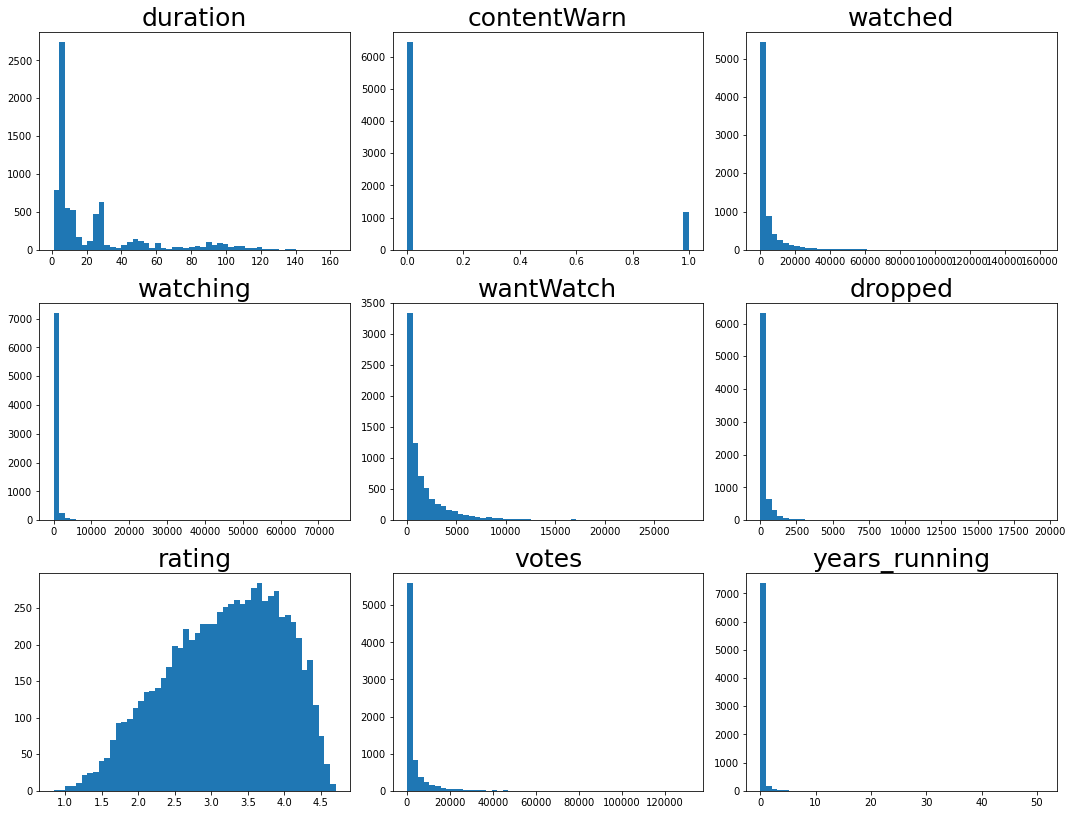

In [62]:
# creating a list of non-tag columns
dist_cols = [
    item for item in data.select_dtypes(include=np.number).columns if "tag" not in item
]

dist_cols = dist_cols[1:len(dist_cols)]

# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(data[dist_cols[i]], bins=50)
    # sns.histplot(data=data, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

# create a copy of the dataframe and use log transformation on some columns

In [63]:
# creating a copy of the dataframe
df3 = data.copy()

# removing contentWarn and studios_colab columns as they have only 0 and 1 values
dist_cols.remove("contentWarn")
# dist_cols.remove("studios_colab")

# also dropping the rating column as it is almost normally distributed
dist_cols.remove("rating")


# using log transforms on some columns

for col in dist_cols:
    df3[col + "_log"] = np.log(df3[col] + 1)

# dropping the original columns
df3.drop(dist_cols, axis=1, inplace=True)
# df3.head()

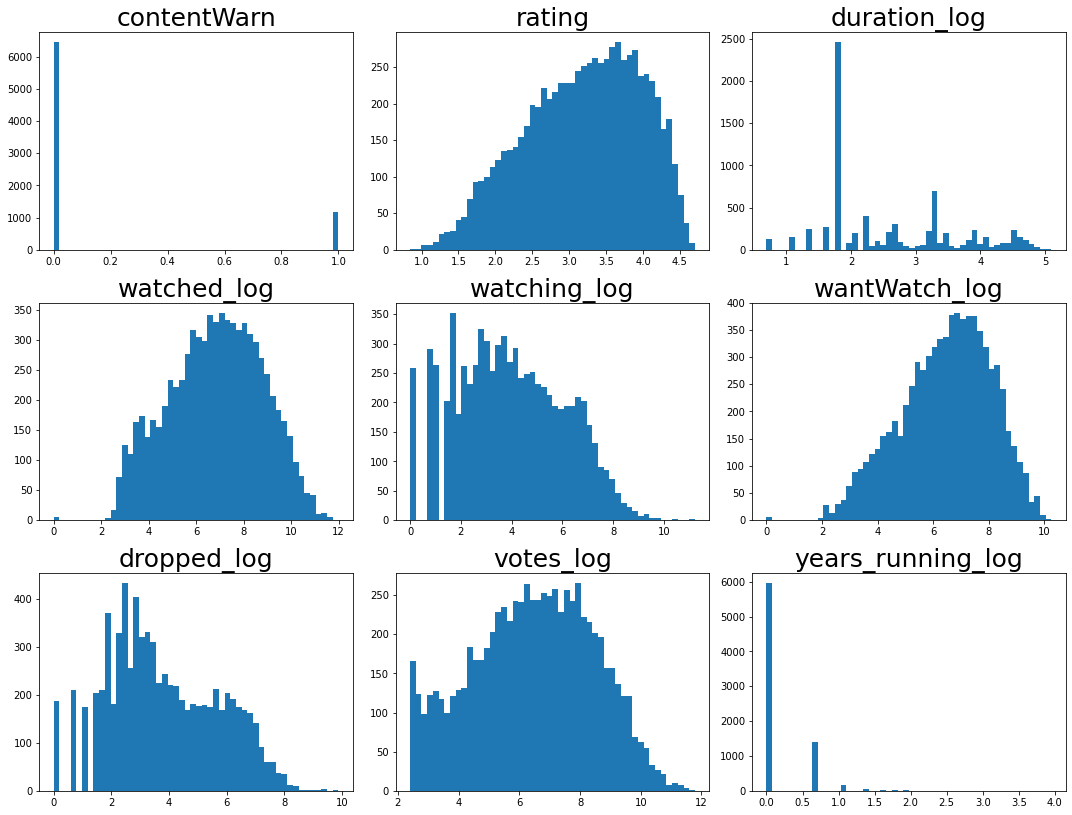

In [64]:
# creating a list of non-tag columns
dist_cols = [
    item for item in df3.select_dtypes(include=np.number).columns if "tag" not in item
]
dist_cols = dist_cols[1:len(dist_cols)]
# let's plot histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df3[dist_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

#check for correlation between the columns after the log transformation

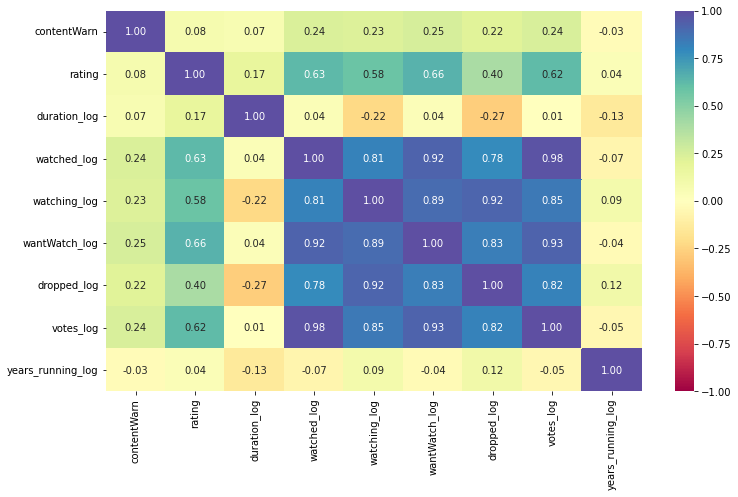

In [65]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df3[dist_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [66]:
df3.to_csv("anime_log.csv", index=False)

In [68]:
df3
print(df3.isnull().sum().sort_values(ascending = False), df3.shape)

mediaType                       0
eps                             0
tag_'Magic'                     0
tag_'CG Animation'              0
tag_'Mecha'                     0
tag_'Ecchi'                     0
tag_'Based on a Light Novel'    0
tag_'Anthropomorphic'           0
tag_'Superpowers'               0
tag_'Promotional'               0
tag_'Sports'                    0
tag_'Historical'                0
tag_'Vocaloid'                  0
tag_Others                      0
studio_to_work                  0
description_no_puntuation       0
description_Clean               0
duration_log                    0
watched_log                     0
watching_log                    0
wantWatch_log                   0
dropped_log                     0
votes_log                       0
tag_'Supernatural'              0
tag_'Seinen'                    0
tag_'Animal Protagonists'       0
tag_'Sci Fi'                    0
ongoing                         0
sznOfRelease                    0
description   